In [1]:
import numpy as np
from math import sqrt
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error
df = pd.read_csv("merge_oil.csv")

In [2]:
data = pd.read_csv("merge_oil.csv") #importing the dataset
data = data.iloc[::-1]

data.index = pd.to_datetime(data["Date"],format="%Y-%m-%d") #turning the dataframe into a time series
data = data.drop(['Date'],axis=1)
split = int(0.8 * len(data))
training_data = data[:split]
test_data = data[split:]

In [3]:
tci_xtrain = pd.concat([training_data["TCI_Open"],training_data["TCI_Low"],training_data["TCI_High"]],axis=1)
tci_ytrain = training_data["TCI_Close"]
tci_xtest = pd.concat([test_data["TCI_Open"],test_data["TCI_Low"],test_data["TCI_High"]],axis=1)
tci_ytest = test_data["TCI_Close"]

In [4]:
tci_xtrain_arr = np.asarray(tci_xtrain)
tci_ytrain_arr = np.asarray(tci_ytrain)
tci_xtest_arr = np.asarray(tci_xtest)
tci_ytest_arr = np.asarray(tci_ytest)

In [42]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.01)
#svr_rbf = SVR(kernel='linear', C=1e3)
#svr_rbf = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)

In [43]:
open_sr = svr_rbf.fit(tci_xtrain_arr,tci_ytrain_arr)

In [44]:
open_y_rbf  = open_sr.predict(tci_xtest_arr)
open_y_trbf = open_sr.predict(tci_xtrain_arr)

In [45]:
print("RBF :",sqrt(mean_squared_error(tci_ytest_arr,open_y_rbf)))

RBF : 13.71767656281398


In [47]:
open_y_rbf

array([251.35708261, 248.3875605 , 249.66612056, 260.55351536,
       249.48268605, 254.00662646, 235.9382772 , 298.49568002,
       325.20949992, 327.6108588 , 306.25694124, 326.65159744,
       318.8601075 , 315.59686688, 304.21804476, 299.32777779,
       308.29387256, 299.39367452, 308.88424271, 298.80052156,
       301.79877563, 307.01407431, 304.86971815, 286.13543382,
       279.23607126, 295.59511284, 232.00079367, 322.63200089,
       321.32081307, 325.62652852, 319.30061514, 354.09089376,
       317.85253454, 327.6691573 , 328.07967604, 325.45753948,
       339.42088717, 319.9414624 , 319.11260335, 325.23215476,
       323.1224903 , 321.78703283, 318.02681409, 317.41098977,
       322.9586951 , 317.69224293, 317.74452217, 309.5116897 ,
       313.77188201, 303.99911605, 307.24990916, 291.40603681,
       299.10253757, 295.76962668, 294.34328378, 279.93411133,
       270.83681632, 267.59537391, 281.14523561, 288.84294832,
       284.51348555, 280.25062784, 273.69123392, 268.95

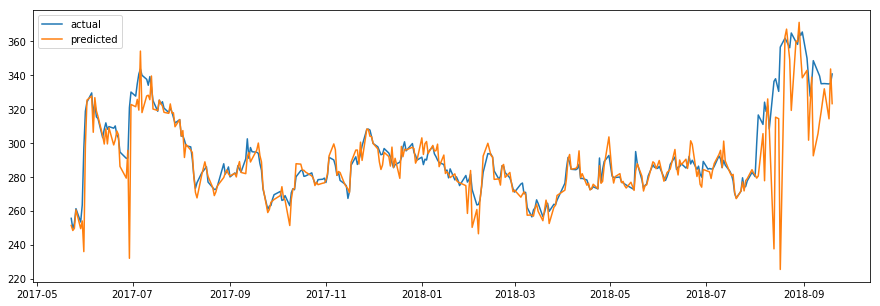

In [48]:

plot_df = pd.DataFrame({'Date':tci_ytest.index,'Actual':tci_ytest_arr.tolist(),'Predicted':open_y_rbf})
plot_df.index = tci_ytest.index

fig = plt.figure(figsize=(15,5))
plt.plot(plot_df['Actual'],label='actual')
plt.plot(plot_df['Predicted'],label='predicted')
plt.legend()
plt.show()

In [35]:
open_y_rbf

array([211.15843543, 213.68921903, 211.34680911, 204.20208896,
       206.9764897 , 224.0484766 , 219.0573943 , 197.65979709,
       212.42657523, 220.27427107, 216.76613682, 212.52016616,
       210.51560123, 219.81181369, 218.21370558, 215.68471232,
       221.30196702, 194.30508421, 207.19204133, 198.3187798 ,
       205.86683991, 201.94102408, 191.56590755, 183.13084691,
       190.62153516, 198.86908047, 192.69434461, 193.75684502,
       193.70908711, 192.54377566, 192.52298544, 191.7274283 ,
       190.43950196, 193.08396475, 192.41200046, 198.90740877,
       182.49253985, 188.02476907, 185.84752125, 187.1771891 ,
       187.66343859, 187.47325981, 190.00754783, 190.53062892,
       188.04385884, 186.28004269, 184.6763417 , 184.6074006 ,
       185.73638897, 186.17110292, 184.83648151, 189.04473739,
       168.91870403, 216.21710526, 185.13903808, 200.65953151,
       207.3593629 , 206.99397871, 218.10577661, 219.11471789,
       215.84158093, 216.14870479, 185.60155664, 223.86

In [12]:
print(tci_ytest_arr.tolist())

[255.550003, 249.399994, 252.75, 261.25, 253.399994, 263.399994, 296.600006, 318.649994, 324.049988, 329.450012, 316.5, 323.5, 315.299988, 314.350006, 303.049988, 308.049988, 311.799988, 308.049988, 309.600006, 308.649994, 310.0, 304.75, 302.950012, 294.600006, 290.899994, 291.100006, 320.75, 329.950012, 327.549988, 334.850006, 340.600006, 343.549988, 339.850006, 337.450012, 333.950012, 339.049988, 332.799988, 324.950012, 318.649994, 325.149994, 322.950012, 324.25, 320.5, 317.899994, 320.75, 318.299988, 314.899994, 311.700012, 313.700012, 303.950012, 304.25, 301.600006, 298.350006, 297.649994, 290.5, 280.350006, 273.25, 276.600006, 282.299988, 284.649994, 285.950012, 276.950012, 273.649994, 272.549988, 272.649994, 274.649994, 287.700012, 281.600006, 283.450012, 285.850006, 279.950012, 282.25, 281.549988, 286.549988, 284.450012, 282.850006, 290.600006, 302.399994, 290.850006, 297.25, 294.799988, 294.5, 293.850006, 287.850006, 283.899994, 272.75, 260.850006, 262.75, 263.100006, 266.79998

In [13]:
#with crude oil
tci_xtrain_co = pd.concat([tci_xtrain,training_data["Price"]],axis=1)
tci_xtest_co = pd.concat([tci_xtest,test_data["Price"]],axis=1)

In [14]:
tci_xtrain_arr_co = np.asarray(tci_xtrain_co)
tci_ytrain_arr_co = np.asarray(tci_ytrain)
tci_xtest_arr_co = np.asarray(tci_xtest_co)
tci_ytest_arr_co = np.asarray(tci_ytest)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.000001)
open_sr_co = svr_rbf.fit(tci_xtrain_arr_co,tci_ytrain_arr_co)
open_y_rbf_co  = open_sr_co.predict(tci_xtest_arr_co)
open_y_trbf_co = open_sr_co.predict(tci_xtrain_arr_co)

In [15]:
open_y_rbf_co

array([250.46855522, 250.95452354, 249.27843788, 258.48157477,
       249.81613167, 256.48741421, 285.02008332, 310.70991184,
       325.89661038, 329.7794676 , 319.50515085, 325.89142349,
       314.70706975, 316.02001765, 304.71873745, 308.94139551,
       310.88502615, 306.64894294, 311.60668773, 308.28231804,
       301.72050857, 305.61629572, 303.96479015, 291.27999237,
       293.40000859, 290.53221993, 313.62993749, 327.79135682,
       326.83825251, 337.80280517, 340.29597743, 344.76678777,
       338.31738689, 340.19857153, 335.44173806, 335.11166745,
       332.68919066, 325.86482883, 320.1297242 , 325.18019027,
       325.37513695, 325.33410889, 321.60700369, 319.23293234,
       323.10488031, 319.76968136, 318.22429724, 311.91155225,
       315.0721243 , 307.39600924, 307.51583879, 306.13231443,
       301.70615817, 300.10005435, 292.40592424, 281.64298392,
       274.14702002, 272.73466558, 283.55071597, 287.99220808,
       284.64618469, 279.2279211 , 273.08753924, 267.48

In [16]:
print("RBF :",sqrt(mean_squared_error(tci_ytest_arr_co,open_y_rbf_co)))

RBF : 7.388537133576232


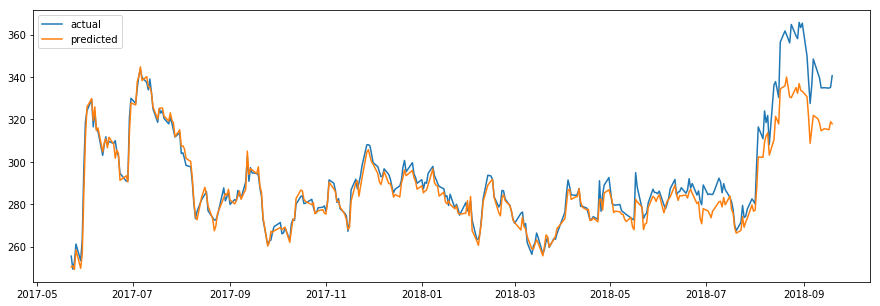

In [17]:
plot_df = pd.DataFrame({'Date':tci_ytest.index,'Actual':tci_ytest_arr.tolist(),'Predicted':open_y_rbf_co})
plot_df.index = tci_ytest.index

fig = plt.figure(figsize=(15,5))
plt.plot(plot_df['Actual'],label='actual')
plt.plot(plot_df['Predicted'],label='predicted')
plt.legend()
plt.show()

In [18]:
#ongc
ongc_xtrain = pd.concat([training_data["ONGC_Open"],training_data["ONGC_Low"],training_data["ONGC_High"]],axis=1)
ongc_ytrain = training_data["ONGC_Close"]
ongc_xtest = pd.concat([test_data["ONGC_Open"],test_data["ONGC_Low"],test_data["ONGC_High"]],axis=1)
ongc_ytest = test_data["ONGC_Close"]
ongc_xtrain_arr = np.asarray(ongc_xtrain)
ongc_ytrain_arr = np.asarray(ongc_ytrain)
ongc_xtest_arr = np.asarray(ongc_xtest)
ongc_ytest_arr = np.asarray(ongc_ytest)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
open_sr = svr_rbf.fit(ongc_xtrain_arr,ongc_ytrain_arr)

In [19]:
open_y_rbf  = open_sr.predict(ongc_xtest_arr)
open_y_trbf = open_sr.predict(ongc_xtrain_arr)
print("RBF :",sqrt(mean_squared_error(ongc_ytest_arr,open_y_rbf)))

RBF : 4.243437170097209


In [20]:
ongc_ytest_arr.tolist()

[174.649994,
 173.699997,
 174.149994,
 175.75,
 175.75,
 178.649994,
 177.0,
 174.0,
 174.0,
 175.75,
 171.449997,
 172.050003,
 170.550003,
 169.199997,
 168.5,
 169.100006,
 169.5,
 167.149994,
 167.149994,
 166.050003,
 169.100006,
 164.800003,
 160.449997,
 158.100006,
 159.949997,
 158.100006,
 157.850006,
 157.300003,
 159.100006,
 159.899994,
 162.800003,
 161.699997,
 159.600006,
 162.399994,
 160.25,
 162.850006,
 158.899994,
 158.350006,
 160.050003,
 161.699997,
 163.0,
 165.850006,
 164.350006,
 163.25,
 163.300003,
 164.0,
 162.899994,
 164.75,
 169.399994,
 167.399994,
 165.399994,
 165.699997,
 166.399994,
 165.899994,
 164.0,
 165.699997,
 163.699997,
 159.649994,
 161.699997,
 160.949997,
 160.600006,
 160.899994,
 157.149994,
 159.449997,
 159.699997,
 159.449997,
 160.600006,
 157.25,
 158.399994,
 156.949997,
 159.949997,
 161.800003,
 162.800003,
 162.300003,
 162.300003,
 161.850006,
 163.050003,
 162.300003,
 161.050003,
 159.350006,
 166.75,
 165.199997,
 165.8

In [21]:
open_y_rbf

array([174.39447128, 175.22784166, 174.83504511, 174.62170905,
       175.07457488, 178.62363025, 177.31024883, 173.791019  ,
       174.01001262, 175.80475252, 172.36710424, 173.42634865,
       170.90091081, 168.72234968, 169.2602145 , 168.93744744,
       169.4648766 , 167.47834683, 166.70050537, 164.77498808,
       169.50255763, 164.7307099 , 161.50389427, 159.4018121 ,
       158.3314012 , 158.83179983, 157.79650779, 158.64218717,
       157.45251373, 160.18650607, 163.45926976, 162.68984835,
       159.35261079, 163.89913079, 161.7717868 , 169.52992738,
       159.2602405 , 157.71328761, 159.01862236, 159.50862136,
       160.82935649, 171.60217474, 167.59131092, 173.50835396,
       172.90655681, 178.10409064, 175.07722779, 162.18554175,
       166.53458671, 167.24743972, 163.72813319, 167.2340303 ,
       166.48024557, 166.51270173, 168.95715639, 165.30907907,
       168.8747034 , 159.15575643, 160.62877018, 160.38403358,
       160.0621357 , 159.68373592, 161.14711329, 160.53

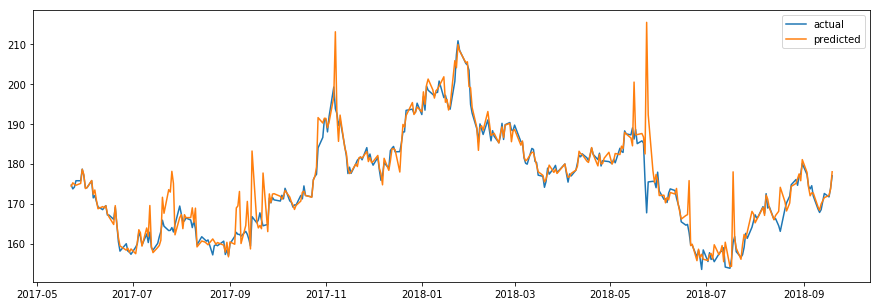

In [22]:
plot_df = pd.DataFrame({'Date':ongc_ytest.index,'Actual':ongc_ytest_arr.tolist(),'Predicted':open_y_rbf})
plot_df.index = ongc_ytest.index

fig = plt.figure(figsize=(15,5))
plt.plot(plot_df['Actual'],label='actual')
plt.plot(plot_df['Predicted'],label='predicted')
plt.legend()
plt.show()

In [23]:
#ongc ohlc+crude oil
#ongc
ongc_xtrain_co = pd.concat([training_data["ONGC_Open"],training_data["ONGC_Low"],training_data["ONGC_High"],training_data["Price"]],axis=1)
ongc_xtest_co = pd.concat([test_data["ONGC_Open"],test_data["ONGC_Low"],test_data["ONGC_High"],test_data["Price"]],axis=1)
ongc_ytrain = training_data["ONGC_Close"]
ongc_ytest = test_data["ONGC_Close"]
ongc_ytrain_arr_co = np.asarray(ongc_ytrain)
ongc_ytest_arr_co = np.asarray(ongc_ytest)
ongc_xtrain_arr_co = np.asarray(ongc_xtrain_co)
ongc_xtest_arr_co = np.asarray(ongc_xtest_co)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
open_sr_co = svr_rbf.fit(ongc_xtrain_arr_co,ongc_ytrain_arr)

In [24]:
open_y_rbf_co  = open_sr_co.predict(ongc_xtest_arr_co)
open_y_trbf_co = open_sr_co.predict(ongc_xtrain_arr_co)
print("RBF :",sqrt(mean_squared_error(ongc_ytest_arr_co,open_y_rbf_co)))

RBF : 2.0611443437613777


In [25]:
open_y_rbf_co

array([174.27470124, 174.20752473, 174.09389557, 176.0909655 ,
       173.44207938, 176.16789197, 175.56203838, 173.0738651 ,
       173.58235362, 176.91182174, 171.68289484, 173.07914227,
       169.56013776, 168.3734088 , 168.92257033, 168.35341759,
       168.78466344, 167.93282444, 166.7507027 , 165.28042843,
       168.19309604, 165.49889842, 161.36748722, 158.26881074,
       157.18270305, 158.36686796, 158.42507154, 157.22036442,
       157.67882422, 160.65946884, 162.05894545, 160.89630736,
       159.78770951, 162.17979751, 160.93674254, 164.32535208,
       159.53658585, 158.31464148, 159.54934379, 160.55531689,
       161.15849223, 166.06709155, 164.07530929, 162.17158768,
       162.16383684, 163.65283182, 162.31315747, 162.96083316,
       168.26285827, 167.20035725, 164.47006371, 164.52085634,
       165.0004394 , 165.8179843 , 163.14704978, 164.22366449,
       163.17353861, 159.23142304, 161.4321597 , 159.84988409,
       160.65258609, 160.6469612 , 159.46021653, 159.29

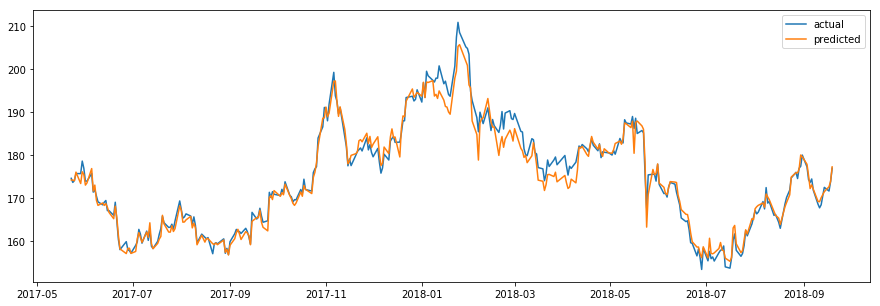

In [26]:
plot_df = pd.DataFrame({'Date':ongc_ytest.index,'Actual':ongc_ytest_arr_co.tolist(),'Predicted':open_y_rbf_co})
plot_df.index = ongc_ytest.index

fig = plt.figure(figsize=(15,5))
plt.plot(plot_df['Actual'],label='actual')
plt.plot(plot_df['Predicted'],label='predicted')
plt.legend()
plt.show()

In [27]:
#ioc 

ioc_xtrain = pd.concat([training_data["IOC_Open"],training_data["IOC_Low"],training_data["IOC_High"]],axis=1)
ioc_ytrain = training_data["IOC_Close"]
ioc_xtest = pd.concat([test_data["IOC_Open"],test_data["IOC_Low"],test_data["IOC_High"]],axis=1)
ioc_ytest = test_data["IOC_Close"]
ioc_xtrain_arr = np.asarray(ioc_xtrain)
ioc_ytrain_arr = np.asarray(ioc_ytrain)
ioc_xtest_arr = np.asarray(ioc_xtest)
ioc_ytest_arr = np.asarray(ioc_ytest)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.01)
open_sr = svr_rbf.fit(ioc_xtrain_arr,ioc_ytrain_arr)

In [28]:
open_y_rbf  = open_sr.predict(ioc_xtest_arr)
open_y_trbf = open_sr.predict(ioc_xtrain_arr)
print("RBF :",sqrt(mean_squared_error(ioc_ytest_arr,open_y_rbf)))

RBF : 5.99400305058214


In [29]:
open_y_rbf

array([211.15843543, 213.68921903, 211.34680911, 204.20208896,
       206.9764897 , 224.0484766 , 219.0573943 , 197.65979709,
       212.42657523, 220.27427107, 216.76613682, 212.52016616,
       210.51560123, 219.81181369, 218.21370558, 215.68471232,
       221.30196702, 194.30508421, 207.19204133, 198.3187798 ,
       205.86683991, 201.94102408, 191.56590755, 183.13084691,
       190.62153516, 198.86908047, 192.69434461, 193.75684502,
       193.70908711, 192.54377566, 192.52298544, 191.7274283 ,
       190.43950196, 193.08396475, 192.41200046, 198.90740877,
       182.49253985, 188.02476907, 185.84752125, 187.1771891 ,
       187.66343859, 187.47325981, 190.00754783, 190.53062892,
       188.04385884, 186.28004269, 184.6763417 , 184.6074006 ,
       185.73638897, 186.17110292, 184.83648151, 189.04473739,
       168.91870403, 216.21710526, 185.13903808, 200.65953151,
       207.3593629 , 206.99397871, 218.10577661, 219.11471789,
       215.84158093, 216.14870479, 185.60155664, 223.86

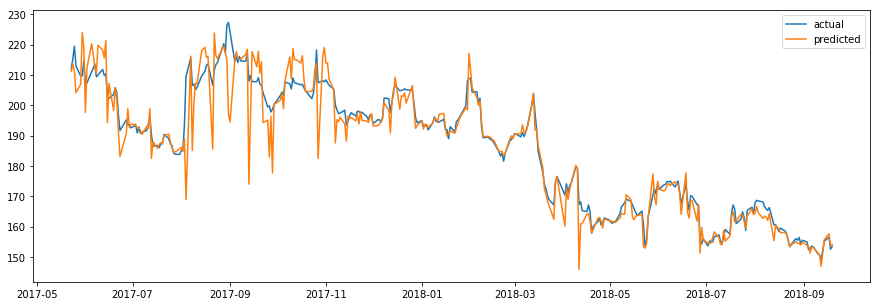

In [30]:
plot_df = pd.DataFrame({'Date':ioc_ytest.index,'Actual':ioc_ytest_arr.tolist(),'Predicted':open_y_rbf})
plot_df.index = ioc_ytest.index

fig = plt.figure(figsize=(15,5))
plt.plot(plot_df['Actual'],label='actual')
plt.plot(plot_df['Predicted'],label='predicted')
plt.legend()
plt.show()

In [31]:
#ioc ohlc+crude oil

ioc_xtrain_co = pd.concat([training_data["IOC_Open"],training_data["IOC_Low"],training_data["IOC_High"],training_data["Price"]],axis=1)

ioc_xtest_co = pd.concat([test_data["IOC_Open"],test_data["IOC_Low"],test_data["IOC_High"],test_data["Price"]],axis=1)

ioc_xtrain_arr_co = np.asarray(ioc_xtrain_co)
ioc_xtest_arr_co = np.asarray(ioc_xtest_co)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.000002)

open_sr = svr_rbf.fit(ioc_xtrain_arr_co,ioc_ytrain_arr)

In [32]:
open_y_rbf_co  = open_sr.predict(ioc_xtest_arr_co)
open_y_trbf_co = open_sr.predict(ioc_xtrain_arr_co)
print("RBF :",sqrt(mean_squared_error(ioc_ytest_arr,open_y_rbf_co)))

RBF : 3.5724400958022127


In [33]:
open_y_rbf_co

array([211.80063159, 214.78749022, 216.52617378, 211.73804545,
       211.73879046, 212.24417893, 214.06296619, 208.82013761,
       207.37431435, 209.72773959, 212.07957741, 211.63942464,
       210.87514191, 209.29942283, 210.01911175, 209.94199003,
       209.37321567, 205.12721705, 204.5478876 , 202.3259432 ,
       204.42144288, 203.3929548 , 198.90988369, 191.80950263,
       191.08940987, 196.1756494 , 192.91150083, 192.89530675,
       193.11882698, 193.19309898, 191.55974478, 191.29371083,
       189.56057178, 192.04739232, 191.84743587, 197.13904547,
       192.50448692, 188.14705839, 186.17280124, 187.10829884,
       187.7678794 , 187.64100509, 189.26148499, 190.04445212,
       188.37450678, 187.19960915, 185.68636461, 183.79187757,
       185.55728787, 186.47299241, 184.9194597 , 192.86360005,
       206.45971533, 212.10571502, 208.5149792 , 208.25246295,
       206.03344363, 204.99347148, 208.63728161, 211.5731969 ,
       212.5211623 , 214.74871489, 210.80647313, 211.36

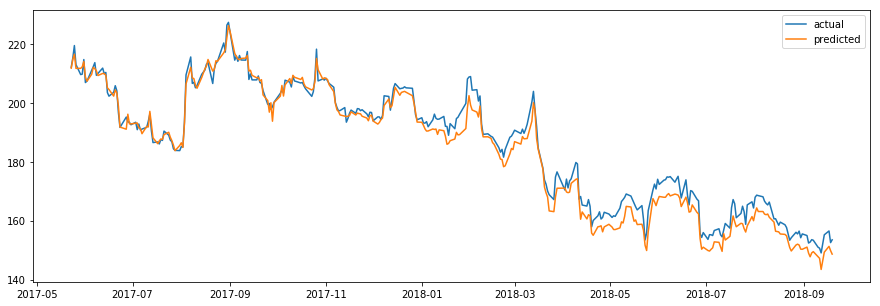

In [34]:
plot_df = pd.DataFrame({'Date':ioc_ytest.index,'Actual':ioc_ytest_arr.tolist(),'Predicted':open_y_rbf_co})
plot_df.index = ioc_ytest.index

fig = plt.figure(figsize=(15,5))
plt.plot(plot_df['Actual'],label='actual')
plt.plot(plot_df['Predicted'],label='predicted')
plt.legend()
plt.show()